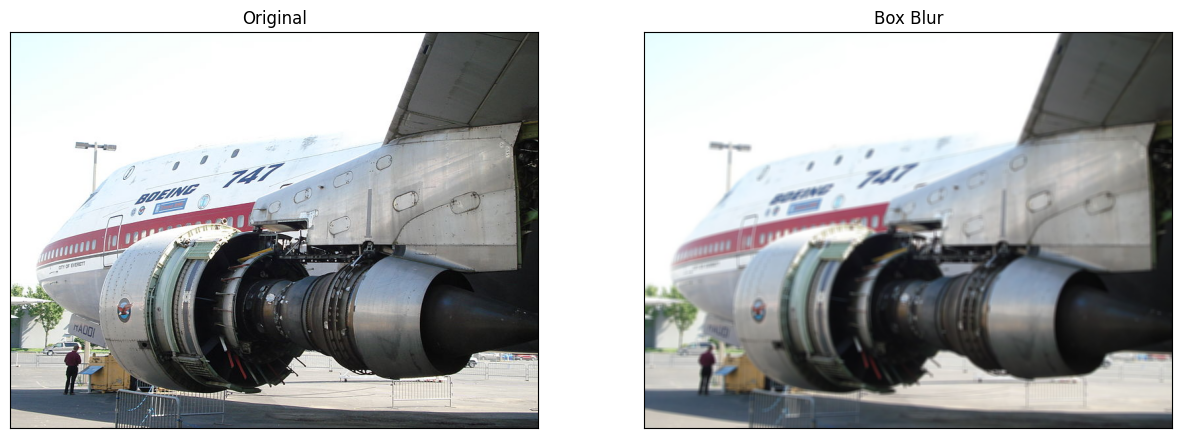

In [ ]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carregando uma imagem via URL. Teste outras!
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/JT9D_on_747.JPG/800px-JT9D_on_747.JPG"
with urllib.request.urlopen(url) as response:
  image_data = response.read()

image_array = np.array(bytearray(image_data), dtype=np.uint8)
original = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
#Dependendo de como a imagem veio, pode ser necessário converter de BGR para RGB
original = cv2.cvtColor(original , cv2.COLOR_BGR2RGB)

#Aplicando matriz de convolução de 6x6. Teste outros tamanhos
kernel_size = 6
kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size*kernel_size)
dst = cv2.filter2D(original,-1,kernel)

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(121)
plt.imshow(original)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(dst)
plt.title('Box Blur')
plt.xticks([]), plt.yticks([])
plt.show()

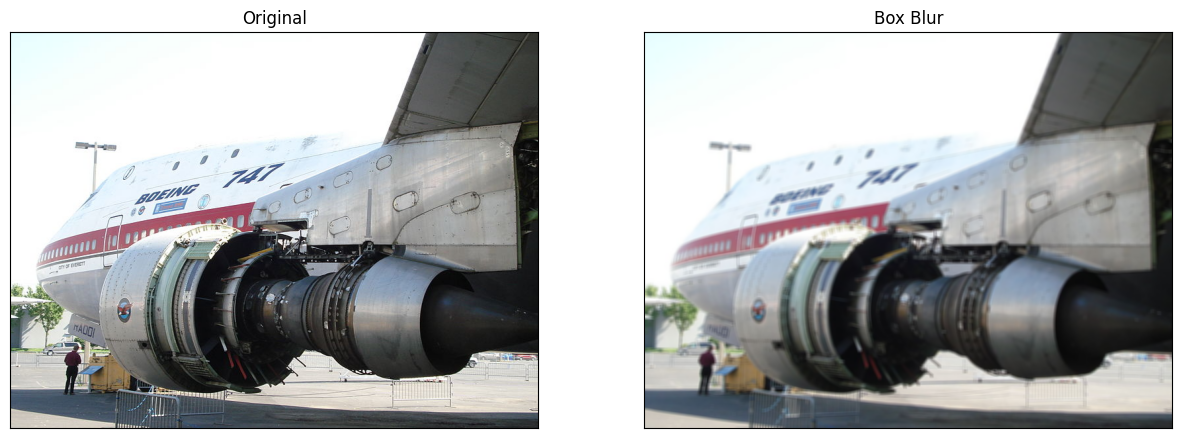

In [ ]:
#O mesmo resultado, mas usando a função pronta do OpenCV (que internamente vai usar a mesma matriz de convolção)

dst = cv2.blur(original, (kernel_size, kernel_size))

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(121)
plt.imshow(original)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(dst)
plt.title('Box Blur')
plt.xticks([]), plt.yticks([])
plt.show()

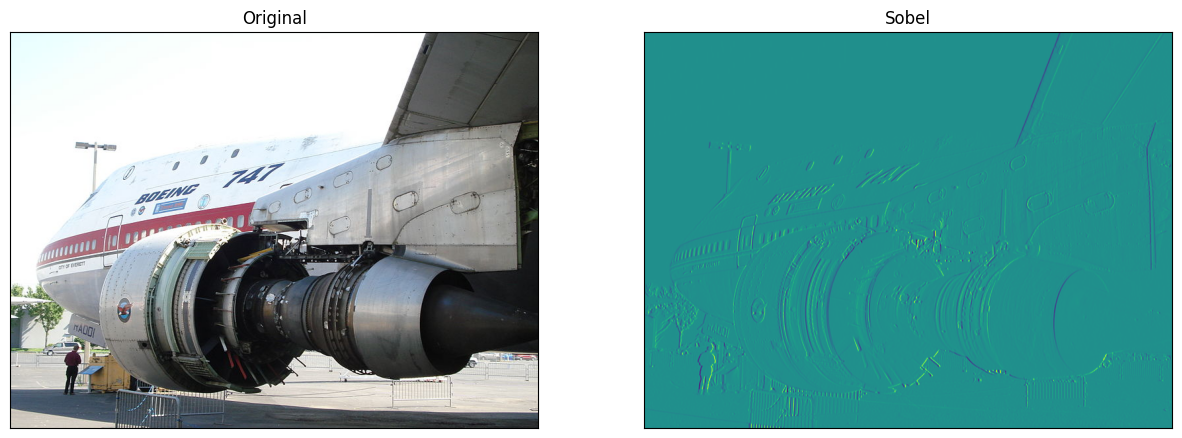

In [ ]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

#Aplicando Sobel no eixo X
sobel = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(121)
plt.imshow(original)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(sobel)
plt.title('Sobel')
plt.xticks([]), plt.yticks([])
plt.show()

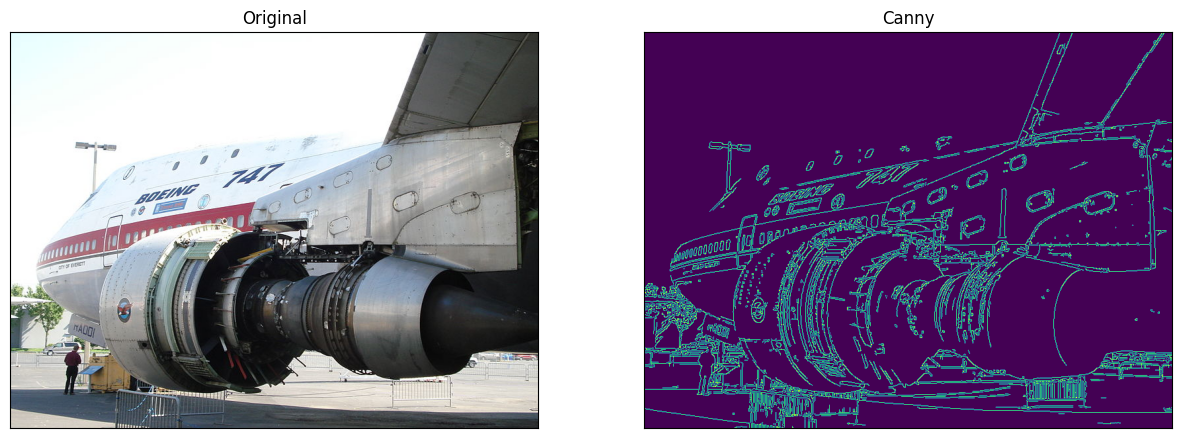

In [ ]:
#Aplicando Canny
#Observação: o filtro de Canny é o resultado da aplicação de várias operações em sequência (não é uma única matriz de convolução)

edges = cv2.Canny(gray,100,200)

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(121)
plt.imshow(original)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges)
plt.title('Canny')
plt.xticks([]), plt.yticks([])
plt.show()

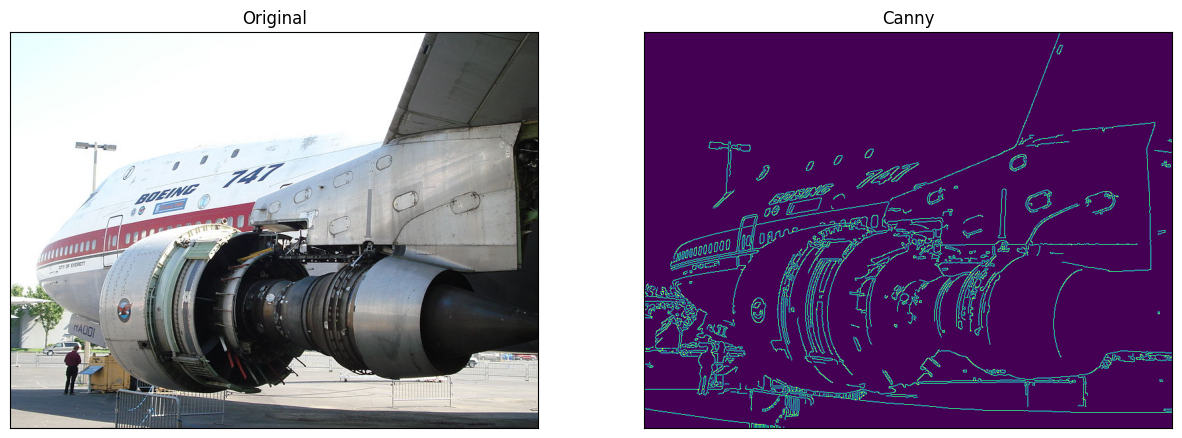

In [ ]:
#Combinando filtros para obter um resultado melhor
gray_blur = cv2.blur(gray, (3, 3))
edges = cv2.Canny(gray_blur,100,200)

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(121)
plt.imshow(original)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges)
plt.title('Canny')
plt.xticks([]), plt.yticks([])
plt.show()